# Random Incidence 

Random incidence elaborates on the idea that when observation takes place without any co-ordination with the process, the end result is usually higher waiting times.

Although the theoretical knowledge of the average waiting time is the average of all arrival times, but when observation itself is random the longer arrival intervals have more probability as they take more space on the timeline.

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Let's first draw some random bus arrival times, 
# with lamba (observed value) = 0.5 time unit between each bus, rounded upto 3 decimal points.

arrival_times_interval = np.round(np.random.exponential(0.5, 10000), 3)
# print(arrival_times)


0.4983862


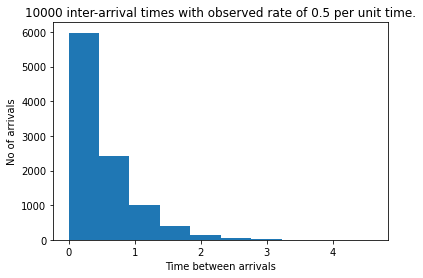

In [29]:
print(np.mean(arrival_times_interval))

plt.hist(arrival_times_interval, 10)
plt.title('10000 inter-arrival times with observed rate of 0.5 per unit time.')
plt.xlabel('Time between arrivals')
plt.ylabel('No of arrivals')
plt.show()

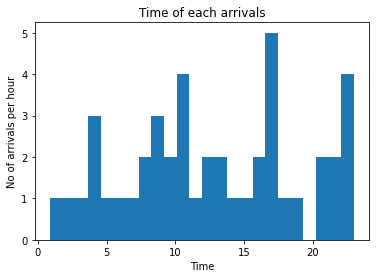

In [30]:
import pandas as pd


arrival_times = np.cumsum(arrival_times_interval)
arrival_times = arrival_times[arrival_times < 24]
plt.hist(arrival_times, 24)
plt.title('Time of each arrivals')
plt.xlabel('Time')
plt.ylabel('No of arrivals per hour')
plt.show()

As we can see from the exponential inter-arrival time are arbitarily distributed when the arrival process is Poisson.

Let us check the total arrivals within 24 unit time.

In [31]:
print('Total arrivals within 24 unit time:', len(arrival_times))

Total arrivals within 24 unit time: 44


## Also, let us check the average waiting time.

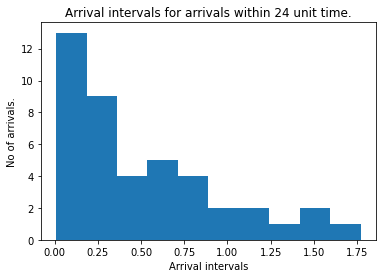

In [32]:
arrival_intervals = np.diff(arrival_times)
plt.hist(arrival_intervals)
plt.title('Arrival intervals for arrivals within 24 unit time.')
plt.xlabel('Arrival intervals')
plt.ylabel('No of arrivals.')
plt.show()

In [16]:
# Average inter arrival time or waiting time.
print('The average inter-arrival time/waiting time.', round(np.mean(arrival_intervals), 2))

The average inter-arrival time/waiting time. 0.45


## Now calculating the waiting time when observation is not in co-ordination with the Poisson process.

We assume that the arrival is uniformly distributed between 00 - 24, and then calculate the waiting time by
comparing it with the arrival_times.

In [36]:
# generating 100 observation times between 0 & 24, rounded upto 3 decimal points

observation_times = sorted(np.round(24 * np.random.random_sample(100), 3))

## Comparing between two arrays and calculating the difference.

Let two arrays X & Y contain values of arrival time and observation time. To calculate the actual waiting time, we need to calculate the value *'j'* in Y such that Y<sub>j</sub> is greater than equal to X<sub>i</sub>

In [71]:
X = np.random.randint(24, size=4)
Y = np.random.randint(24, size=4)

# The waiting time array will be - [0.5, 0.2, 0.6]

O = []
for j in sorted(Y):
    diff = float("inf")
    for i in sorted(X):
        if i < j:
            continue
        else:
            temp = i - j
            if temp < diff:
                diff = temp
    O.append(diff)
print(sorted(X), sorted(Y), O)                

[1, 17, 21, 22] [8, 10, 17, 21] [9, 7, 0, 0]
